<a href="https://colab.research.google.com/github/mohamedafdailat/TP_IA/blob/main/TP_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting the drive on colabs**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Semi Conductor Manufacturing Data Set**

The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1). This is a 1:14 proportion. In this work not only a feature selection method for extracting the post discriminative sensors is proposed, but also boosting and data generation techniques are devised to deal with highly imbalance between the pass and fail cases.

In [5]:
!ls '/content/uci-secom.csv'

/content/uci-secom.csv


**Importing basic Libraries**

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


**Taille de la base de données**

In [8]:
data = pd.read_csv('/content/uci-secom.csv')

print(data.shape)

(1567, 593)


**visualiser les valeurs d'une colonne spécifique du dataset (ici la colonne '25') sous forme de graphique en tige (stem plot)**

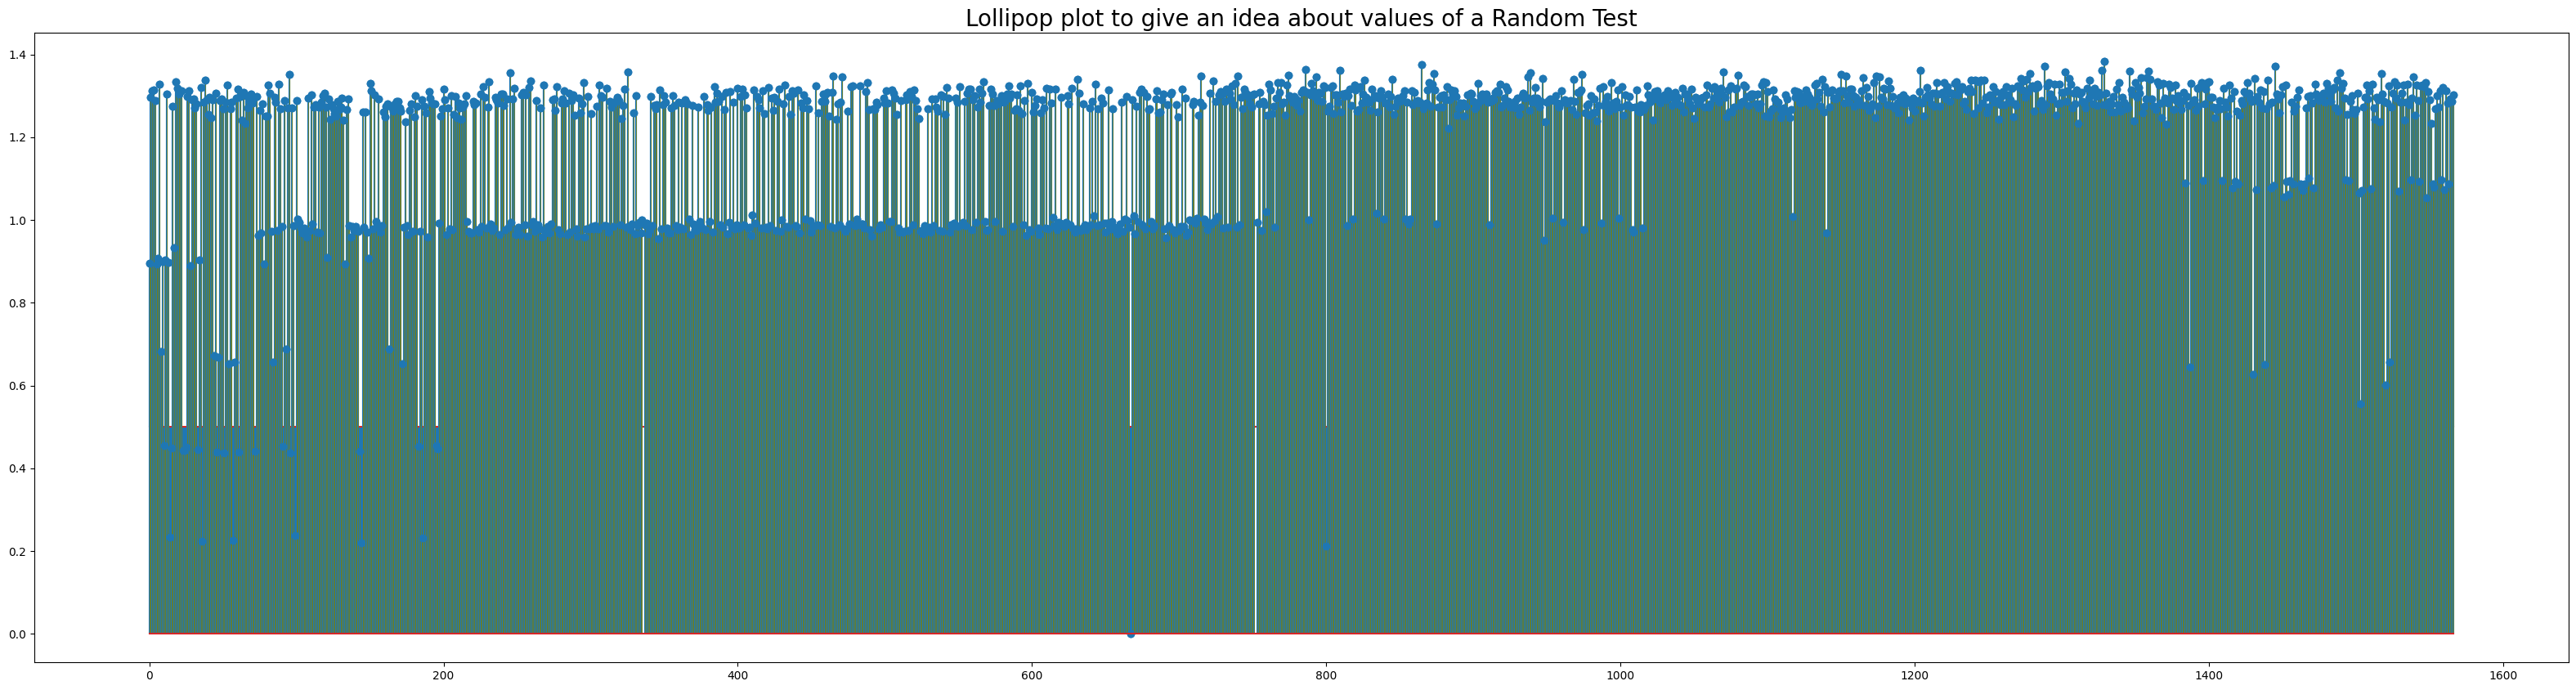

In [9]:
# create data
values = data['25']

plt.rcParams['figure.figsize'] = (40, 10)
# position is customized with the bottom argument
plt.stem(values, markerfmt=' ', bottom=0.5)

# note that this works as well
plt.stem(values, basefmt=" ")

plt.title('Lollipop plot to give an idea about values of a Random Test', fontsize = 20)
(markers, stemlines, baseline) = plt.stem(values)
plt.setp(stemlines, linestyle="-", color="olive", linewidth=0.5 )
plt.show()

**Exploratory Data Analysis**

In [10]:
data.sample(10)

Time        0        1          2          3       4  \
1103  2008-09-26 14:20:00  3065.12  2627.29  2249.2556  2065.0624  2.1216   
734   2008-05-09 15:30:00  3069.73  2533.45  2218.6333   870.5620  1.3084   
231   2008-08-17 12:16:00  2940.65      NaN  2214.0556  1150.7775  1.3772   
296   2008-08-19 08:07:00  2864.05  2533.75  2224.0000  1510.0797  1.5611   
60    2008-07-31 15:36:00  3042.08  2694.31  2206.5112  1244.1552  1.2691   
1380  2008-06-10 21:48:00  3093.31  2456.82  2207.9555  1283.4368  1.8467   
292   2008-08-19 06:24:00  3029.19  2459.56  2214.7111  1493.8781  1.5899   
636   2008-01-09 22:05:00  2980.53  2221.10  2167.9444   861.8041  1.4140   
1084  2008-09-25 15:40:00  2978.96      NaN  2250.3667  1847.0925  2.0218   
1413  2008-08-10 05:38:00  2973.39  2528.67  2195.9778  1388.2869  1.5605   

          5         6       7       8  ...     582     583     584     585  \
1103  100.0   95.7967  0.1222  1.3728  ...  0.5056  0.0115  0.0034  2.2656   
734   100.0  106.9089  0.1195  1.4645  ...  0.4929  0.0155  0.0038  3.1383   
231   100.0  102.9389  0.1205  1.4978  ...  0.5038  0.0188  0.0040  3.7356   
296   100.0   99.8300  0.1199  1.3743  ...  0.5025  0.0197  0.0044  3.9136   
60    100.0  101.6667  0.1229  1.5928  ...  0.5039  0.0116  0.0030  2.3065   
1380  100.0   95.4022  0.1216  1.4198  ...  0.4988  0.0126  0.0032  2.5209   
292   100.0  103.9367  0.1202  1.4470  ...  0.4968  0.0178  0.0043  3.5803   
636   100.0  106.6033  0.1243  1.5782  ...  0.5029  0.0186  0.0036  3.7038   
1084  100.0   91.0589  0.1214  1.3809  ...  0.5045  0.0115  0.0033  2.2871   
1413  100.0  103.2400  0.1234  1.3622  ...  0.5019  0.0135  0.0041  2.6866   

         586     587     588       589                 Phase  Pass/Fail  
1103  0.0798  0.0280  0.0075   35.1003  Implantation ionique         -1  
734   0.0335  0.0084  0.0030   25.1494       Test électrique         -1  
231   0.0118  0.0098  0.0031   83.1192               Gravure          1  
296   0.0291  0.0237  0.0071   81.3456  Implantation ionique         -1  
60    0.0201  0.0216  0.0075  107.8331  Implantation ionique         -1  
1380  0.0203  0.0134  0.0038   65.9827  Implantation ionique         -1  
292   0.0291  0.0237  0.0071   81.3456       Test électrique         -1  
636   0.0328  0.0235  0.0068   71.5333  Implantation ionique         -1  
1084  0.0389  0.0172  0.0052   44.2355       Test électrique         -1  
1413  0.0378  0.0651  0.0195  171.9936       Test électrique         -1  

[10 rows x 593 columns]

In [11]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '582', '583', '584', '585', '586', '587', '588', '589', 'Phase',
       'Pass/Fail'],
      dtype='object', length=593)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 593 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(2)
memory usage: 7.1+ MB


In [13]:
data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [14]:
data.isnull().any().any()

np.True_

In [15]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros

data = data.replace(np.nan, 0)
data.isnull().any().any()

np.False_

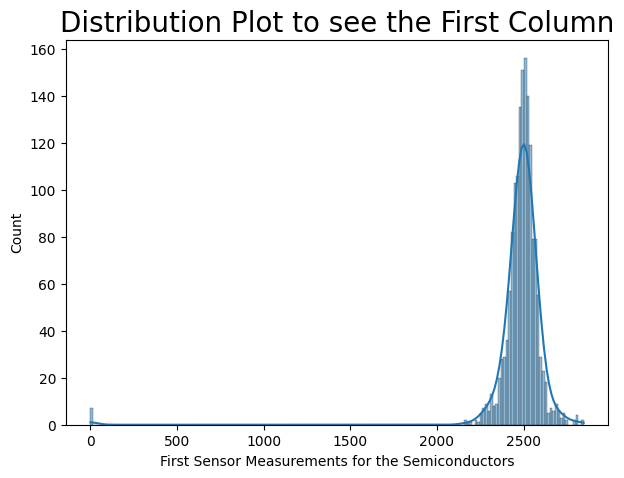

In [16]:
# Distribution plot to see the range of values in the second column
plt.rcParams['figure.figsize'] = (7, 5)
sns.histplot(data['1'], kde=True)  # Utilisation de histplot avec kde=True pour inclure la courbe de densité
plt.title('Distribution Plot to see the First Column', fontsize=20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

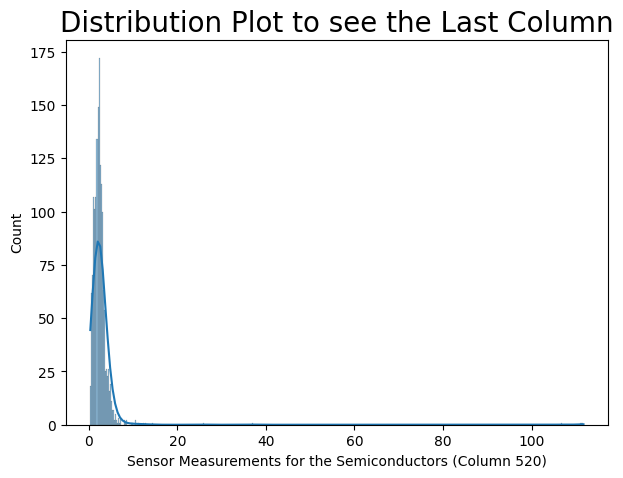

In [17]:
# Distribution plot to see the range of values in the column '520'
plt.rcParams['figure.figsize'] = (7, 5)
sns.histplot(data['520'], kde=True)  # Utilisation de histplot avec kde=True pour inclure la courbe de densité
plt.title('Distribution Plot to see the Last Column', fontsize=20)
plt.xlabel('Sensor Measurements for the Semiconductors (Column 520)')
plt.show()

In [18]:
data['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

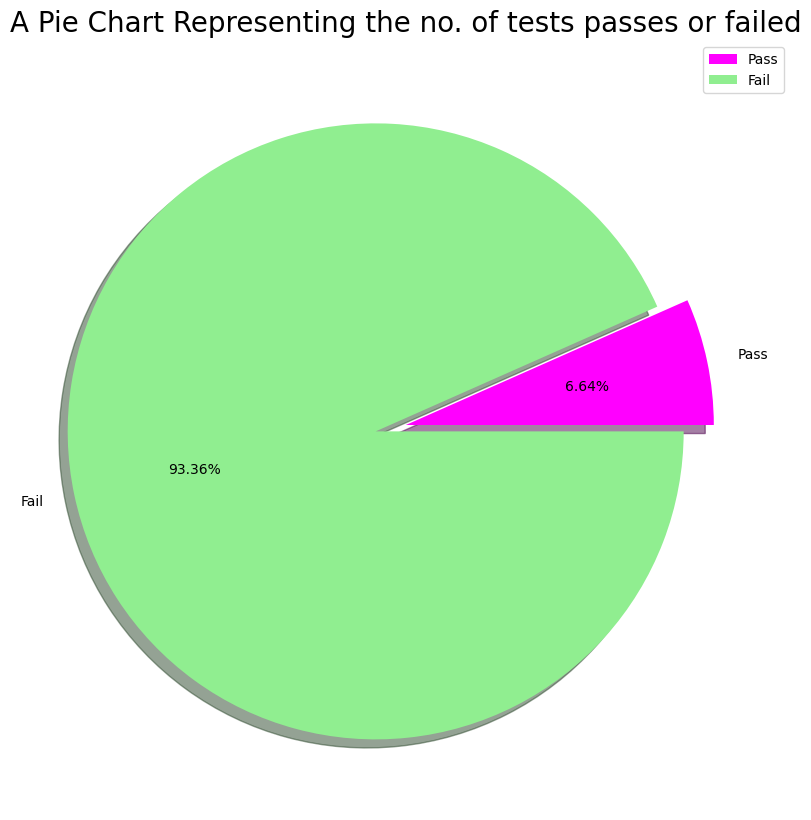

In [19]:
# pie chart

labels = ['Pass', 'Fail']
size = [104, 1463]
colors = ['magenta', 'lightgreen']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing the no. of tests passes or failed', fontsize = 20)
plt.legend()
plt.show()

**Affichage des types de données pour chaque colonne**

In [20]:
# Affichage des types de données pour chaque colonne
print("Types de données pour chaque colonne:")
print(data.dtypes)

# Vérification si toutes les colonnes sont numériques
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = [col for col in data.columns if col not in numeric_columns]

print("\nNombre de colonnes numériques:", len(numeric_columns))
print("Colonnes numériques:", list(numeric_columns))

if non_numeric_columns:
    print("\nColonnes non numériques:", non_numeric_columns)
    print("Ces colonnes devront être converties ou traitées différemment.")
else:
    print("\nToutes les colonnes sont numériques, aucune conversion nécessaire.")

Types de données pour chaque colonne:
Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
587          float64
588          float64
589          float64
Phase         object
Pass/Fail      int64
Length: 593, dtype: object

Nombre de colonnes numériques: 591
Colonnes numériques: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', 

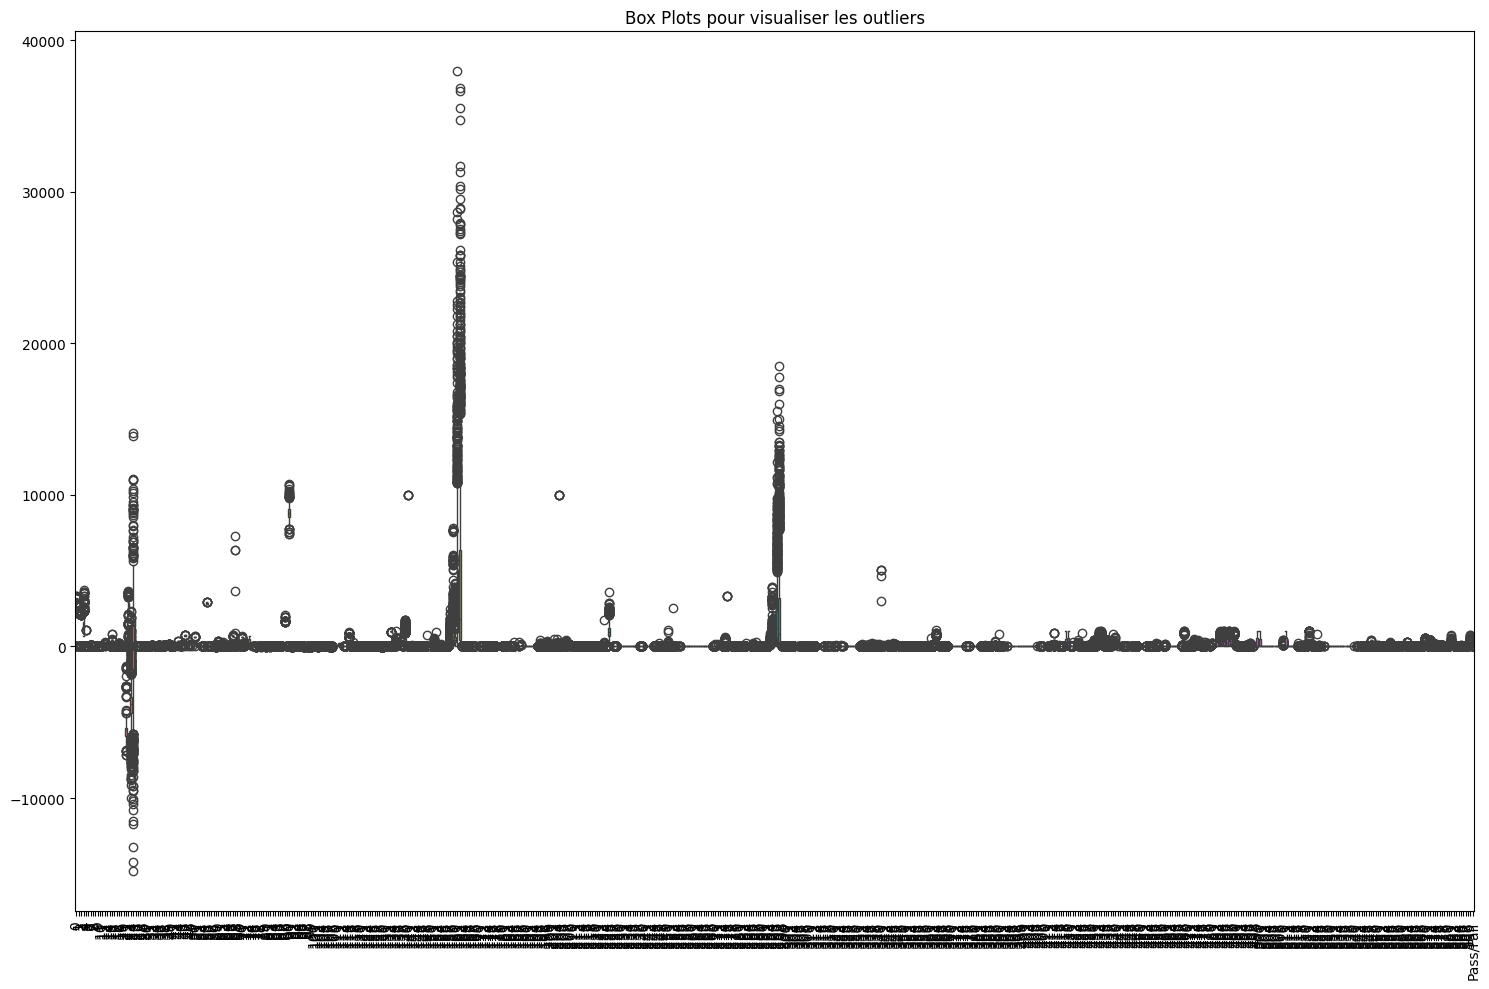

Nombre d'outliers par colonne:
0: 55 outliers
1: 91 outliers
2: 39 outliers
3: 65 outliers
4: 62 outliers
5: 14 outliers
6: 108 outliers
7: 21 outliers
8: 8 outliers
9: 26 outliers
10: 30 outliers
11: 9 outliers
12: 14 outliers
13: 0 outliers
14: 14 outliers
15: 10 outliers
16: 37 outliers
17: 18 outliers
18: 15 outliers
19: 56 outliers
20: 29 outliers
21: 37 outliers
22: 55 outliers
23: 195 outliers
24: 122 outliers
25: 41 outliers
26: 41 outliers
27: 26 outliers
28: 7 outliers
29: 13 outliers
30: 14 outliers
31: 356 outliers
32: 28 outliers
33: 55 outliers
34: 47 outliers
35: 44 outliers
36: 47 outliers
37: 100 outliers
38: 86 outliers
39: 140 outliers
40: 313 outliers
41: 214 outliers
42: 1 outliers
43: 4 outliers
44: 34 outliers
45: 12 outliers
46: 7 outliers
47: 1 outliers
48: 8 outliers
49: 1 outliers
50: 9 outliers
51: 0 outliers
52: 0 outliers
53: 33 outliers
54: 35 outliers
55: 9 outliers
56: 25 outliers
57: 21 outliers
58: 16 outliers
59: 201 outliers
60: 12 outliers
61: 67 o

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fonction pour détecter les outliers avec la méthode IQR
def detect_outliers(df, columns):
    outliers_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers_indices[col] = list(outliers)
    return outliers_indices

# Création de box plots pour visualiser les outliers pour chaque colonne
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plots pour visualiser les outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Détection des outliers pour chaque colonne numérique
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
outliers_indices = detect_outliers(data, numeric_columns)

# Affichage du nombre d'outliers pour chaque colonne
print("Nombre d'outliers par colonne:")
for col, indices in outliers_indices.items():
    print(f"{col}: {len(indices)} outliers")

# Affichage des statistiques des outliers pour une colonne spécifique (si nécessaire)
# Par exemple, pour la première colonne numérique
if numeric_columns.size > 0:
    first_col = numeric_columns[0]
    if outliers_indices[first_col]:
        print(f"\nStatistiques des outliers pour {first_col}:")
        print(data.loc[outliers_indices[first_col], first_col].describe())

# Décision sur le traitement des outliers
# Option 1: Supprimer les outliers
# all_outliers = set()
# for indices in outliers_indices.values():
#     all_outliers.update(indices)
# data_no_outliers = data.drop(index=list(all_outliers))
# print(f"\nDimensions du dataset après suppression des outliers: {data_no_outliers.shape}")

# Option 2: Remplacer les outliers par des valeurs limites
data_capped = data.copy()
for col in numeric_columns:
    Q1 = data_capped[col].quantile(0.25)
    Q3 = data_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_capped[col] = np.where(data_capped[col] < lower_bound, lower_bound, data_capped[col])
    data_capped[col] = np.where(data_capped[col] > upper_bound, upper_bound, data_capped[col])
print("\nComparaison des statistiques avant et après le traitement des outliers:")
print("Avant:")
print(data.describe())
print("\nAprès:")
print(data_capped.describe())

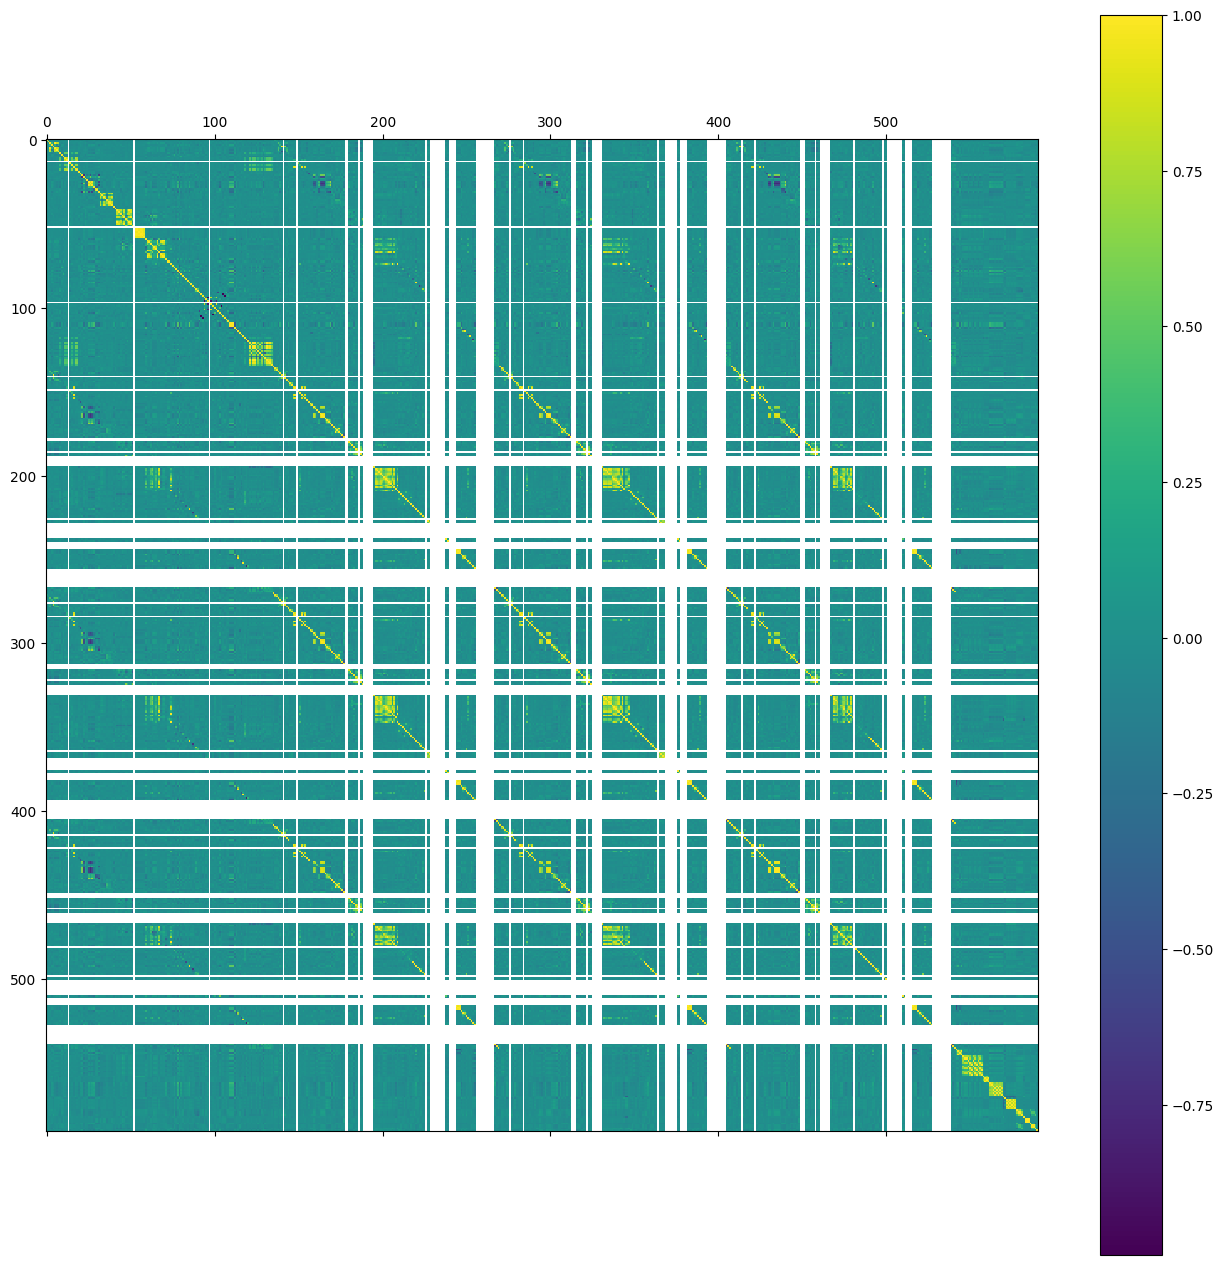

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'data' est votre dataframe
# 1. Supprimez les colonnes non numériques
data_numeric = data.select_dtypes(include=['number'])

# 2. Calculez la matrice de corrélation
corr_matrix = data_numeric.corr()

# 3. Affichez la matrice de corrélation avec matshow
plt.rcParams['figure.figsize'] = (25, 25)
plt.matshow(corr_matrix)
plt.colorbar()
plt.show()

**Suppression de la colonne time et Matrice de corrélation**

Colonnes non numériques trouvées : Index(['Phase'], dtype='object')


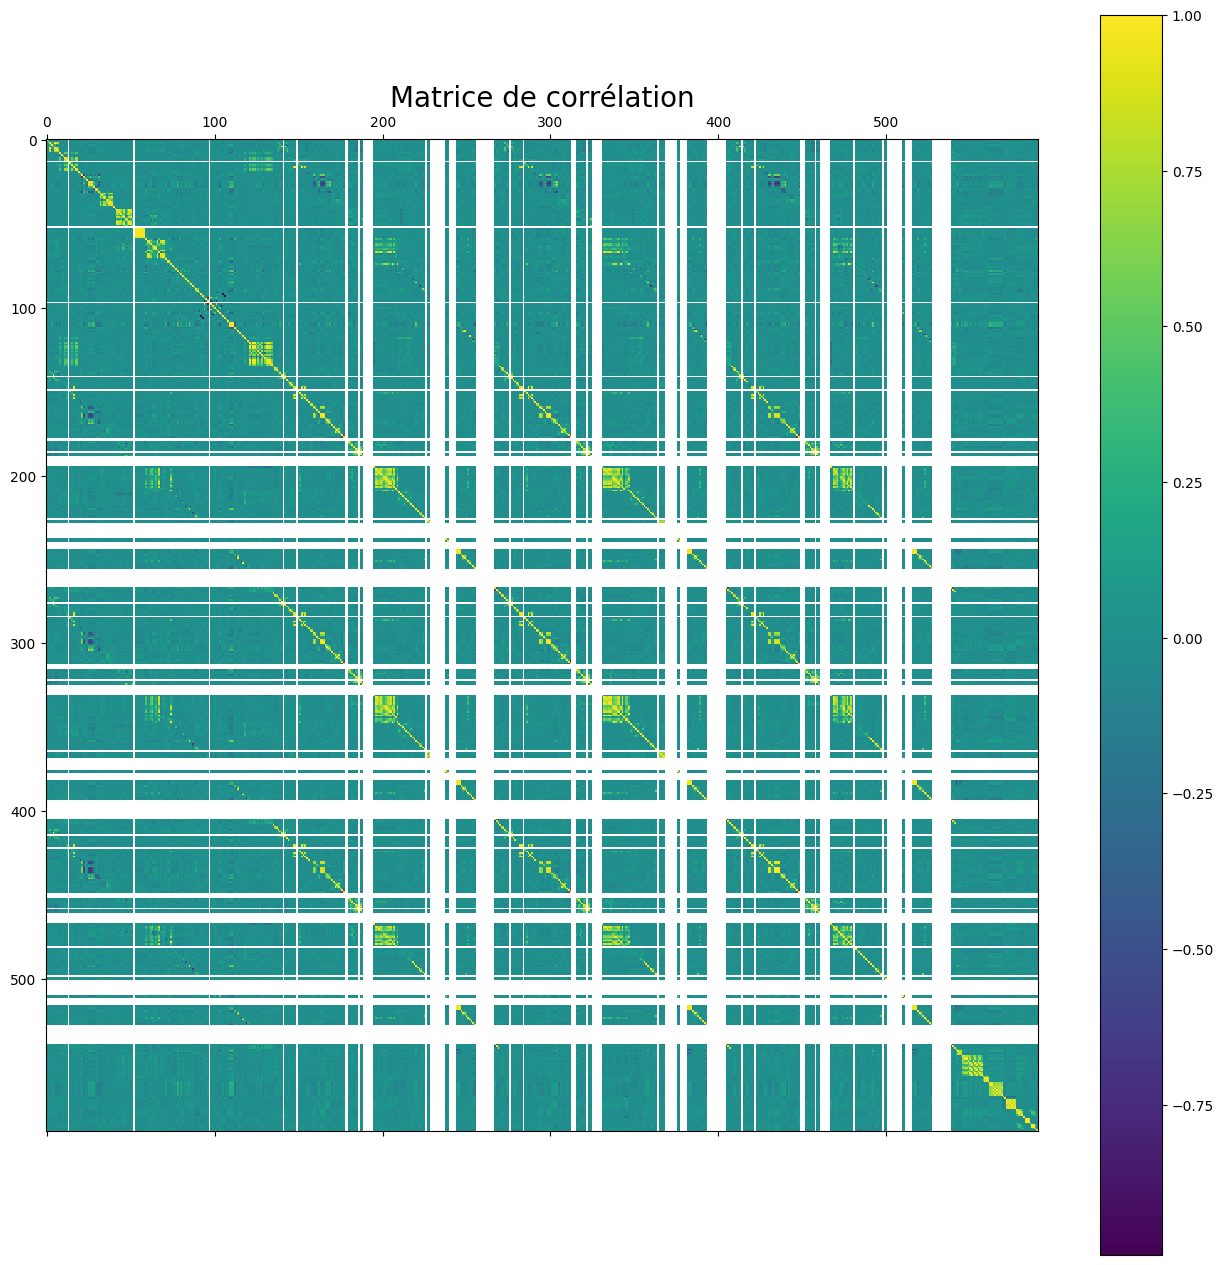

In [23]:
# Supprimer la colonne 'Time' si elle existe
if 'Time' in data.columns:
    data = data.drop(columns=['Time'])

# Vérifier s'il reste des colonnes non numériques
non_numeric_columns = data.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print("Colonnes non numériques trouvées :", non_numeric_columns)
    # Supprimer les colonnes non numériques
    data = data.drop(columns=non_numeric_columns)

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Afficher la matrice de corrélation avec matshow
plt.rcParams['figure.figsize'] = (25, 25)
plt.matshow(correlation_matrix)
plt.colorbar()
plt.title('Matrice de corrélation', fontsize=20)
plt.show()

In [24]:
# Heatmap

fig, axis = plt.subplots(figsize = (100, 100))

corr = data.corr()

sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), ax = axis)

<Axes: >

**Data Pre-processing**

In [29]:
# deleting the first column
#data = data.drop(columns = ['Time'], axis = 1)
#data.shape
# déjà fait

In [30]:
# separating the dependent and independent data

x = data.iloc[:,:590]
y = data.iloc[:, 590]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


In [31]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 590)
shape of x_test:  (314, 590)
shape of y_train:  (1253,)
shape of y_test:  (314,)


In [32]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [143]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre dataframe est nommé 'data'
# Si ce n'est pas le cas, remplacez 'data' par le nom de votre dataframe

# Affichage des types de données pour chaque colonne
print("Types de données pour chaque colonne:")
print(data.dtypes)

# Vérification si toutes les colonnes sont numériques
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = [col for col in data.columns if col not in numeric_columns]

print("\nNombre de colonnes numériques:", len(numeric_columns))
print("Colonnes numériques:", list(numeric_columns))

if non_numeric_columns:
    print("\nColonnes non numériques:", non_numeric_columns)
    print("Ces colonnes devront être converties ou traitées différemment.")
else:
    print("\nToutes les colonnes sont numériques, aucune conversion nécessaire.")

# Vérification des données manquantes par colonne
missing_values = data.isnull().sum()
print("\nNombre de valeurs manquantes par colonne:")
print(missing_values)

Types de données pour chaque colonne:
0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 591, dtype: object

Nombre de colonnes numériques: 591
Colonnes numériques: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', 

**Before Sampling**

**Modelling without PCA**

**Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.9585987261146497


<Axes: title={'center': 'Confusion Matrix for Random Forest Classifer'}>

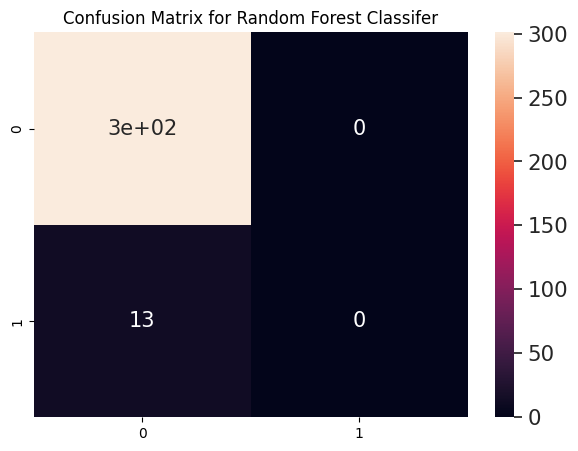

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Random Forest Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [35]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(1 / 13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy * 100, "%")

Anamoly Detection Accuracy:  7.6923076923076925 %


**Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.8885350318471338


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

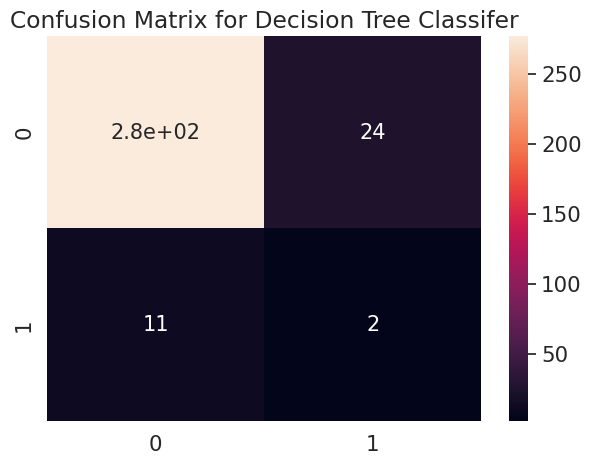

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

**Support Vector Machines**

In [38]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9337589784517158
Testing Accuarcy:  0.9585987261146497


<Axes: title={'center': 'Confusion Matrix for Support Vector Classifer'}>

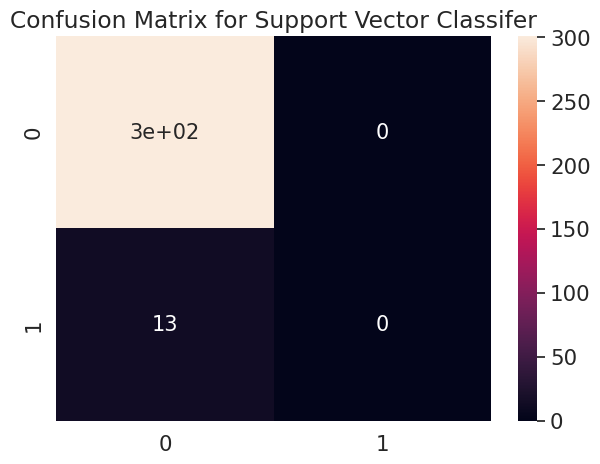

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Support Vector Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [40]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(0 / 13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy * 100, "%")

Anamoly Detection Accuracy:  0.0 %


**Naive Bayes Classifier**

In [41]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(var_smoothing = 5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.902633679169992
Testing Accuarcy:  0.9140127388535032


<Axes: title={'center': 'Confusion Matrix for Naive Bayes Classifer'}>

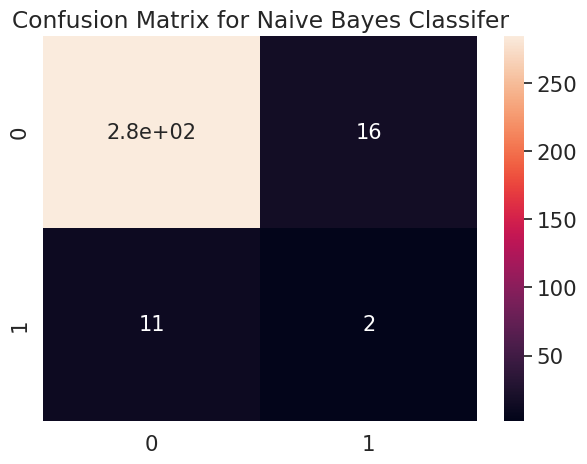

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Naive Bayes Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [43]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(2 / 13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  15.384615384615385 %


**AdaBoost Classifier**

In [44]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9409417398244214
Testing Accuarcy:  0.9490445859872612


<Axes: title={'center': 'Confusion Matrix for Ada Boost Classifer'}>

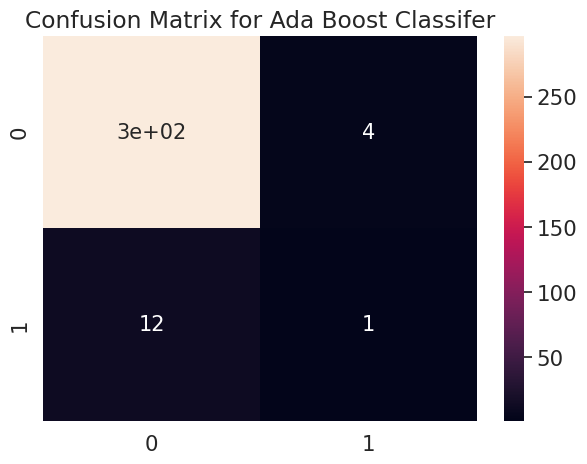

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Ada Boost Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [46]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(2/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  15.384615384615385 %


**Xg Boost**

In [47]:
from xgboost import XGBClassifier

# Re-encoder les étiquettes
y_train = y_train.replace({-1: 0})
y_test = y_test.replace({-1: 0})

# Créer et entraîner le modèle
model = XGBClassifier()
model.fit(x_train, y_train)

# Faire des prédictions
y_pred = model.predict(x_test)

# Afficher les performances
print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuracy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9585987261146497


<Axes: title={'center': 'Confusion Matrix for Xg Boost Classifer'}>

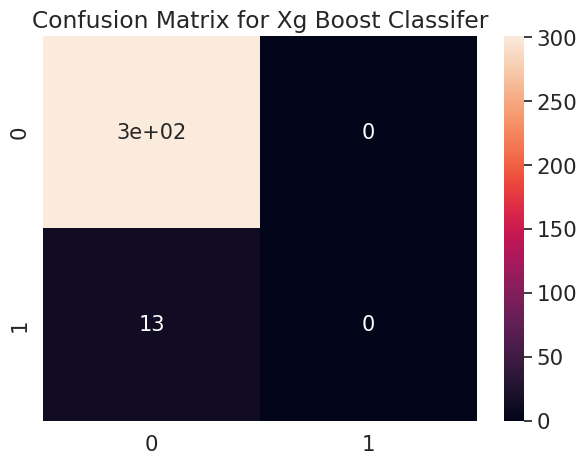

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Xg Boost Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [49]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**K Nearest Neighbors**

In [50]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9297685554668795
Testing Accuarcy:  0.9585987261146497


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

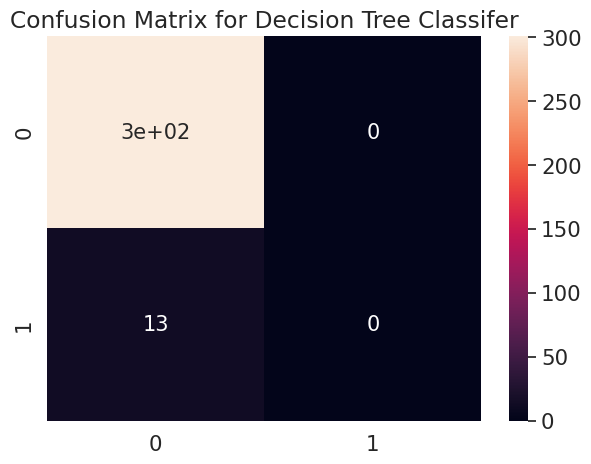

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [52]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**Visualization of Classification v/s Anamoly Detection Accuracy**

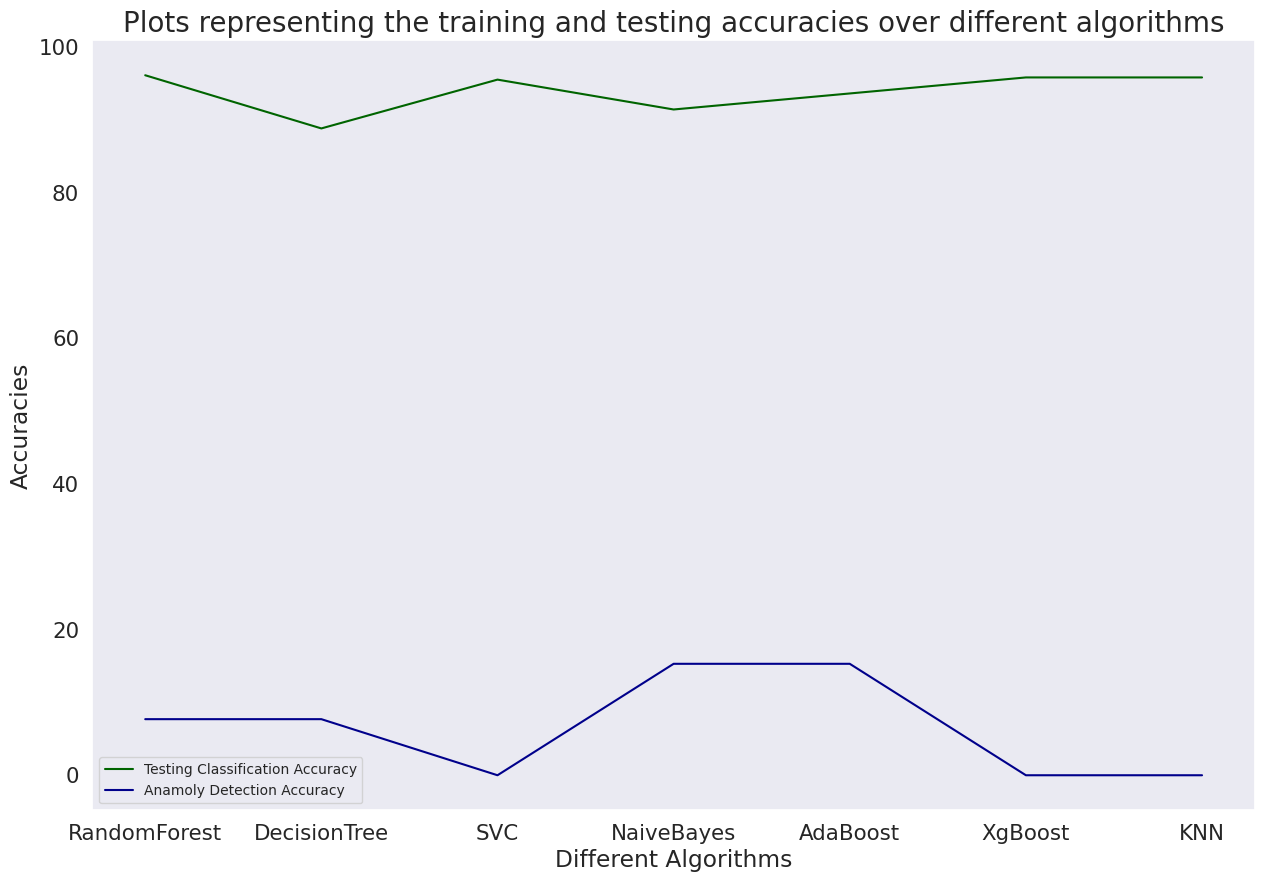

In [53]:
# plotting the train test results for all the 9 algorithms

test = [96.1, 88.8, 95.5, 91.4, 93.6, 95.8, 95.8]
anamoly = [7.7, 7.7, 0, 15.3, 15.3, 0, 0]

plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Plots representing the training and testing accuracies over different algorithms', fontsize = 20)
plt.plot(range(0, 7), test, c = 'darkgreen', )
plt.plot(range(0, 7), anamoly, c = 'darkblue',)
plt.xlabel('Different Algorithms')
plt.ylabel('Accuracies')
labels = "Testing Classification Accuracy", "Anamoly Detection Accuracy"

n_groups = 7
index = np.arange(n_groups)

plt.xticks(index, ('RandomForest', 'DecisionTree', 'SVC', 'NaiveBayes', 'AdaBoost', 'XgBoost', 'KNN'))
plt.legend(labels, loc = 'best', fontsize = 10)
plt.show()

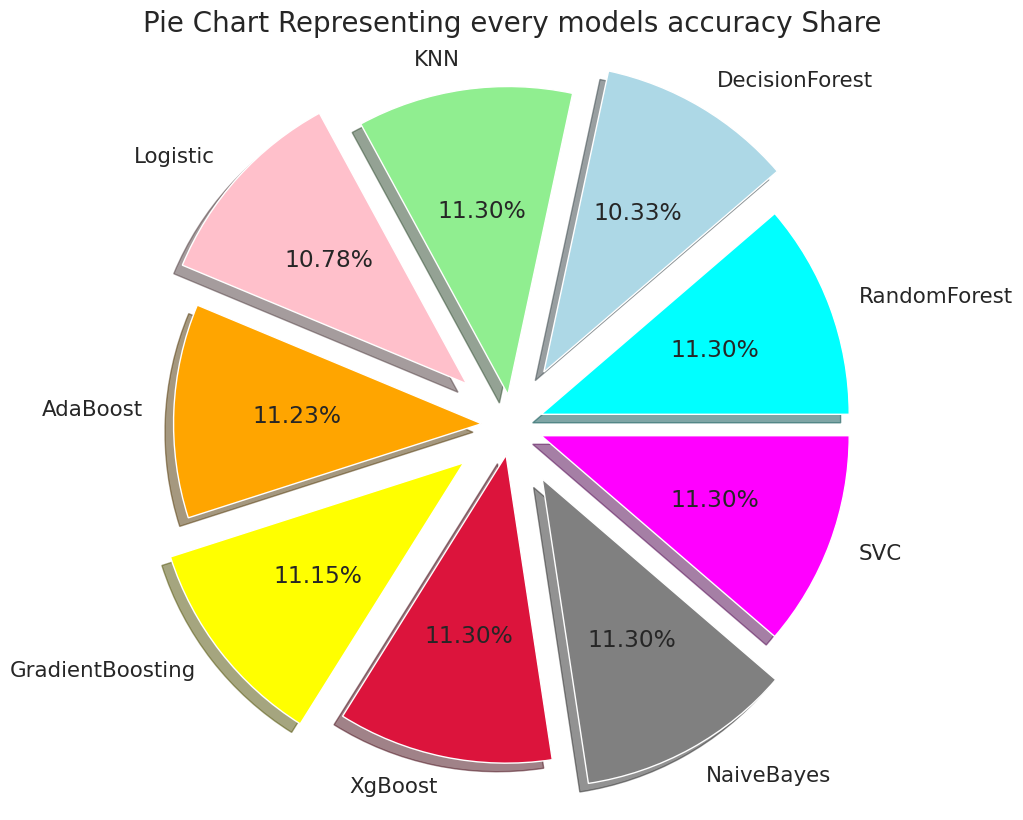

In [54]:
# visualizing each model's performance

labels = "RandomForest", "DecisionForest", "KNN", "Logistic", "AdaBoost", "GradientBoosting", "XgBoost", "NaiveBayes", "SVC"
# size corresponds to the test accuracies  of each model
size = [97.4, 89, 97.4, 92.9, 96.8, 96.1, 97.4, 97.4, 97.4]
colors = ['cyan', 'lightblue', 'lightgreen', 'pink', 'orange', 'yellow', 'crimson', 'gray', 'magenta']
explode = [0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1]

plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart Representing every models accuracy Share', fontsize = 20)
plt.axis('off')
#plt.legend(labels, loc = 'upper right')
plt.show()

**After Sampling of the Dataset**

**Under-Sampling**

In [55]:
failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [56]:
data['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [57]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [58]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [59]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [60]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [61]:

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail']
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 590)
(208, 1)


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [64]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Random Forest**

In [65]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy:  1.0
Testing Accuarcy:  0.7857142857142857


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

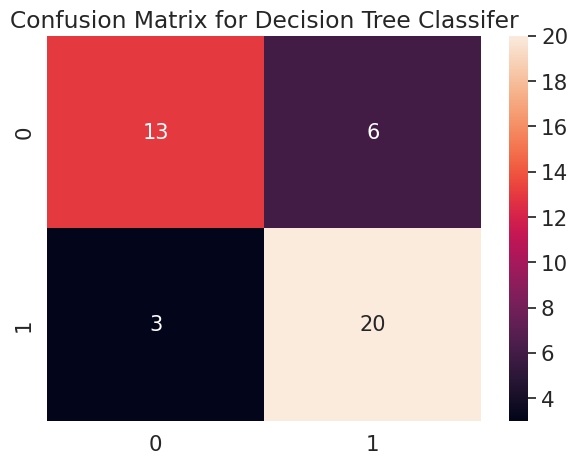

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

**Anamoly Detection Accuracy**

In [67]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [68]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.74 %


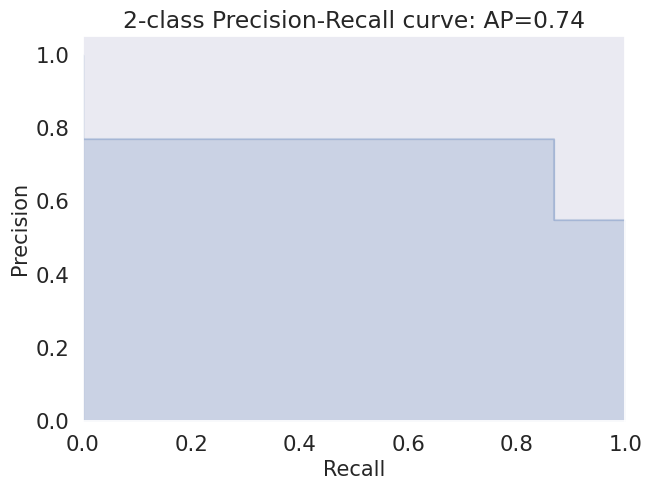

In [69]:
from sklearn.metrics import precision_recall_curve
from inspect import signature  # Utiliser la fonction signature native de Python

# Calculer la courbe de précision-rappel
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Gérer l'argument 'step' pour plt.fill_between
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

# Tracer la courbe de précision-rappel
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

# Ajouter des labels et un titre
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(y_test, y_pred)))
plt.show()

**Decision Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.5238095238095238


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

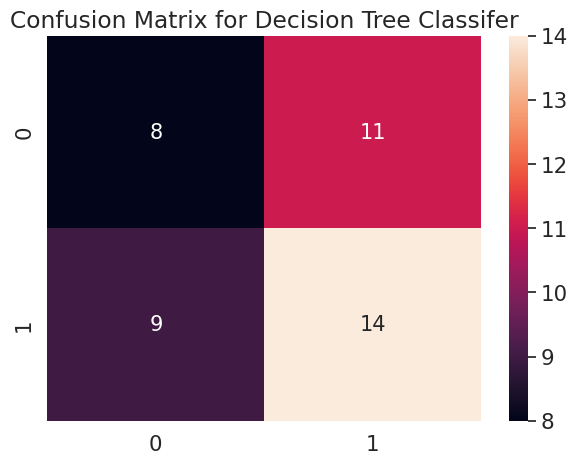

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [72]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [73]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.56 %


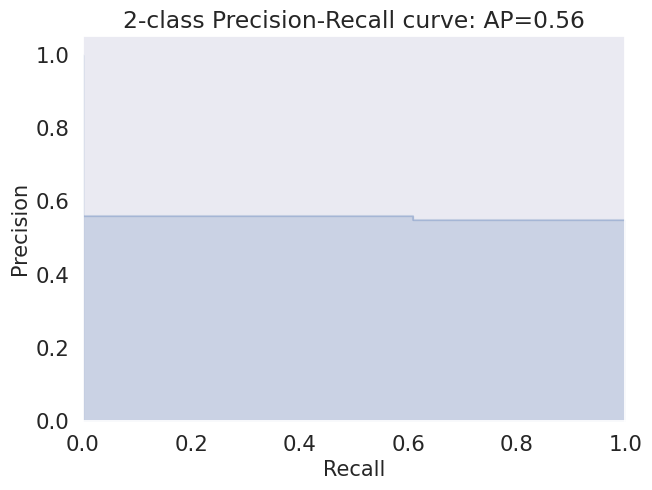

In [74]:
from sklearn.metrics import precision_recall_curve
from inspect import signature  # Utiliser la fonction signature native de Python

# Calculer la courbe de précision-rappel
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Gérer l'argument 'step' pour plt.fill_between
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

# Tracer la courbe de précision-rappel
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

# Ajouter des labels et un titre
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(y_test, y_pred)))
plt.show()

**Xg- Boost Classifier**

In [75]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Re-encoder les étiquettes
y_train = y_train.replace({-1: 0})
y_test = y_test.replace({-1: 0})

# Créer et entraîner le modèle
model = XGBClassifier(max_depth=1)
model.fit(x_train, y_train)

# Faire des prédictions
y_pred = model.predict(x_test)

# Afficher les performances
print("Testing Accuracy: ", model.score(x_test, y_test))

Testing Accuracy:  0.6666666666666666


In [76]:
# finding the AUPRC Score
# PR AUC is the area under the curve where x is recall and y is precision.

from sklearn.metrics import average_precision_score

probabilities = model.fit(x_train, y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

AUPRC = 0.8569717351228046


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

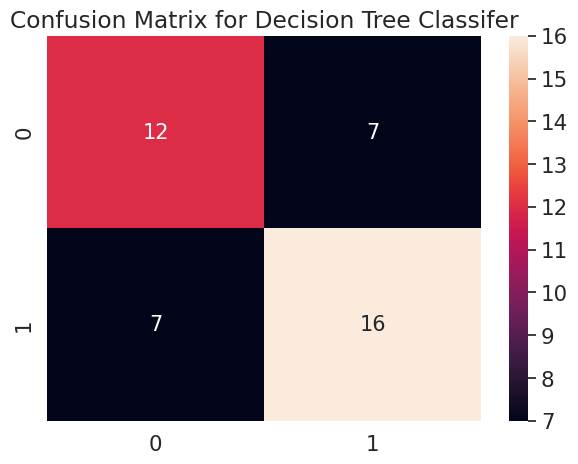

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [78]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(17/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  77.27272727272727 %


In [79]:
from sklearn.model_selection import learning_curve

weights = (y == 0).sum()/(1.0*(y == -1).sum())
trainSizes, trainScores, crossValScores = learning_curve(XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4),
                                                         x_train, y_train, scoring = 'average_precision')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_w

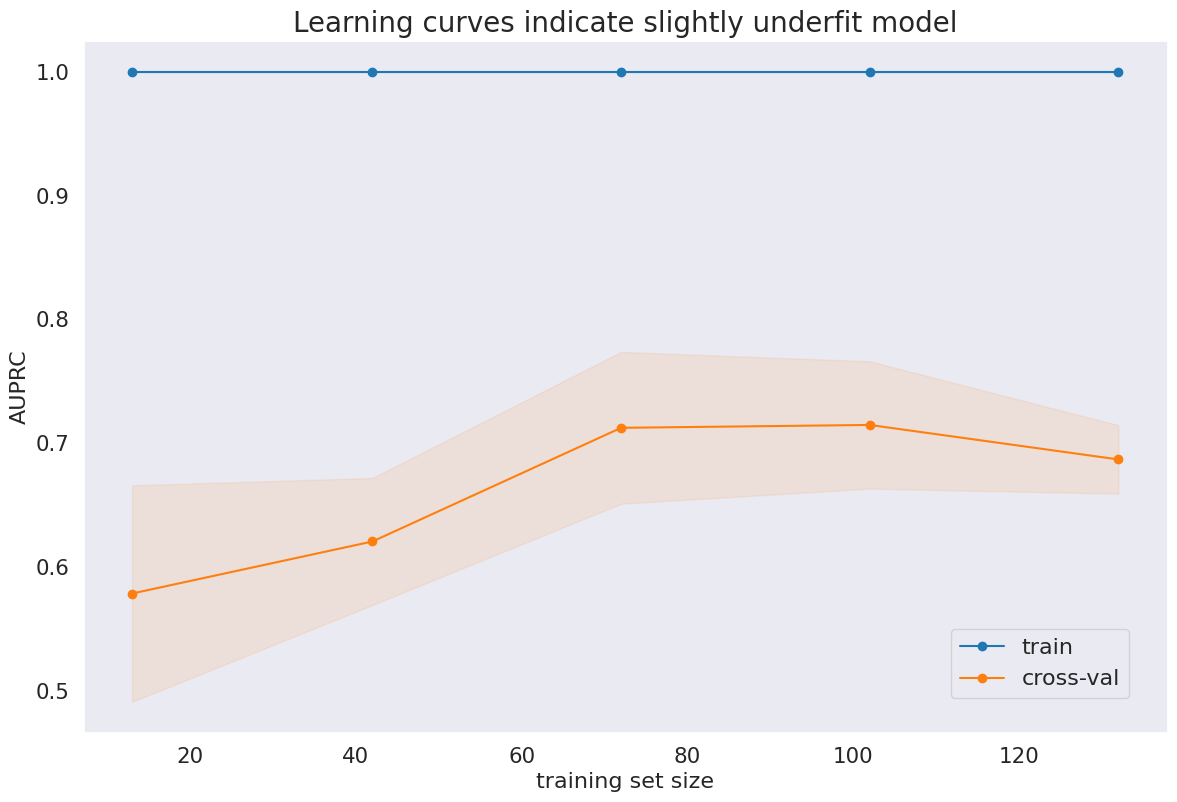

In [80]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd, crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])


plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16);
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

**Comparison of Results Obtained by Under Sampling**

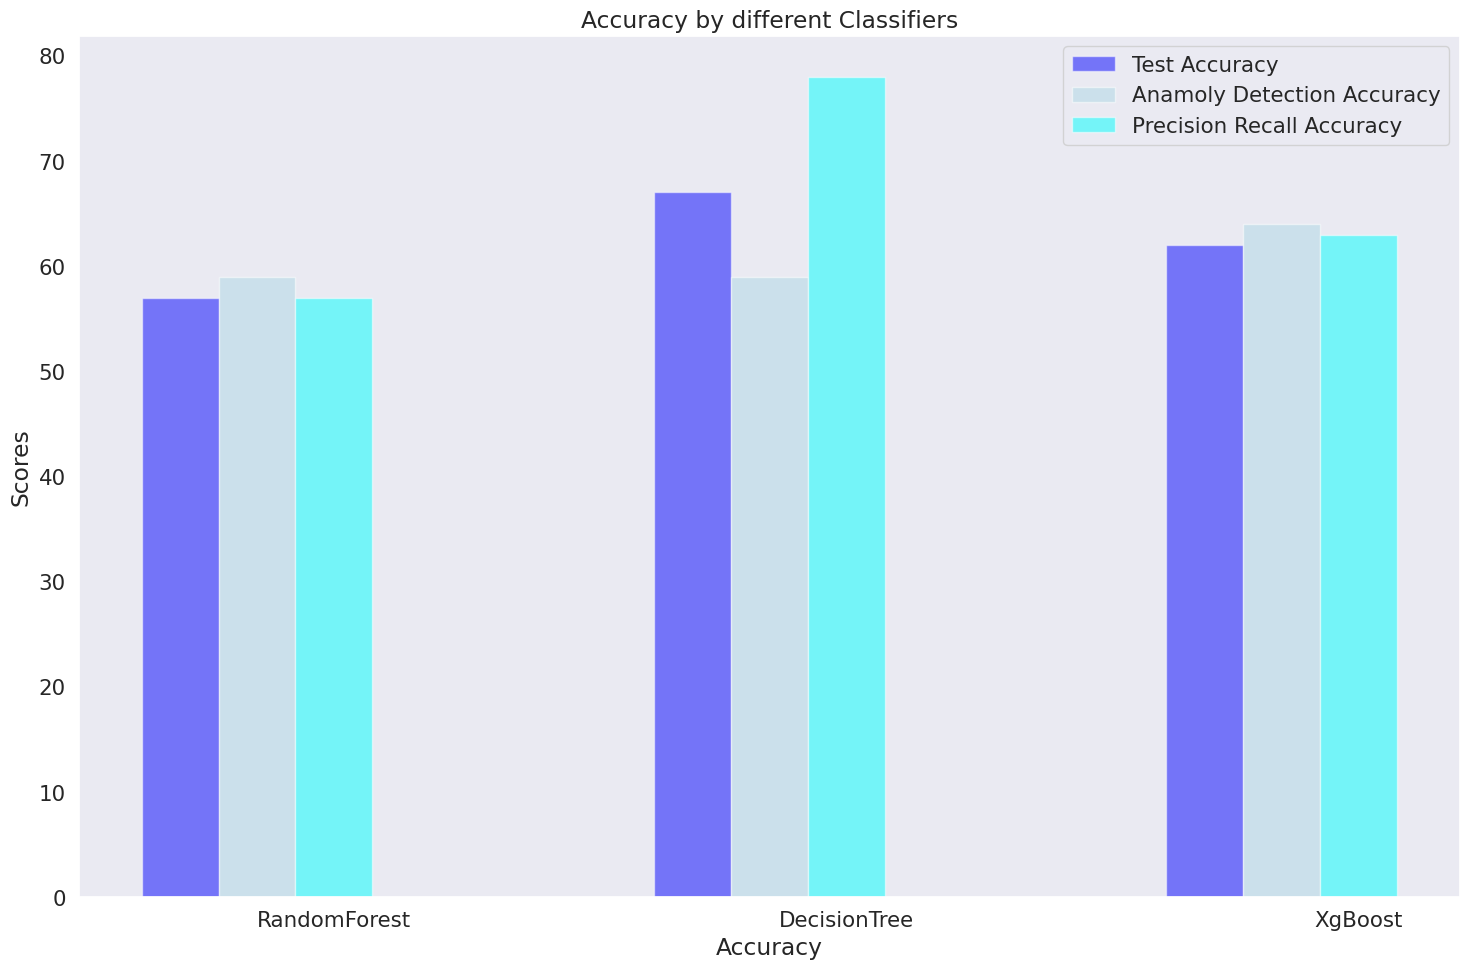

In [82]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
Test_Accuracy = (57, 67, 62 )
Anamoly_Detection_Accuracy = (59, 59, 64)
Precision_Recall_Accuracy = (57, 78, 63)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15

rects1 = plt.bar(index, Test_Accuracy, bar_width, alpha = 0.5, color = 'blue', label = 'Test Accuracy')
rects2 = plt.bar(index + bar_width, Anamoly_Detection_Accuracy, bar_width, alpha = 0.5, color = 'lightblue', label = 'Anamoly Detection Accuracy')
rects3 = plt.bar(index + 2*bar_width, Precision_Recall_Accuracy, bar_width, alpha = 0.5 , color = 'cyan', label = 'Precision Recall Accuracy' )

plt.rcParams['figure.figsize'] = (15, 10)
plt.xlabel('Accuracy')
plt.ylabel('Scores')
plt.title('Accuracy by different Classifiers')
plt.xticks(index + 2*bar_width, ('RandomForest', 'DecisionTree', 'XgBoost'))
plt.legend()
plt.tight_layout()
plt.show()

**SMOTE(Over-Sampling) to treat the Anamoly Detection**

In [83]:
!pip install -U imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE

# Utiliser fit_resample au lieu de fit_sample
x_resample, y_resample = SMOTE().fit_resample(x, y.values.ravel())

# Afficher les dimensions des données rééchantillonnées
print("Shape of x_resample:", x_resample.shape)
print("Shape of y_resample:", y_resample.shape)

Shape of x_resample: (218, 590)
Shape of y_resample: (218,)


We can see that the sizes of the x_resample and y_resample are same now, It is done by over sampling which means the class which was very less in number that is the fail class has now produced some replicated results to increase the size and hence to iradicate the problem of biasedness over the dataset in the classes of fail and pass.

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [87]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Random Forest Classifier**

In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy:  1.0
Testing Accuarcy:  0.6666666666666666


<Axes: >

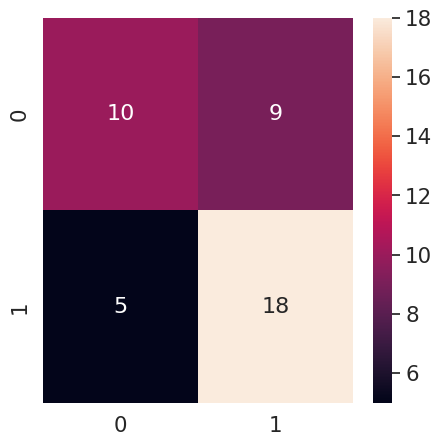

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [90]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(10/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  45.45454545454545 %


**Decision Tree Classifier**

In [91]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
from sklearn.naive_bayes import GaussianNB

Training Accuracy:  1.0
Testing Accuracy:  0.6190476190476191


<Axes: >

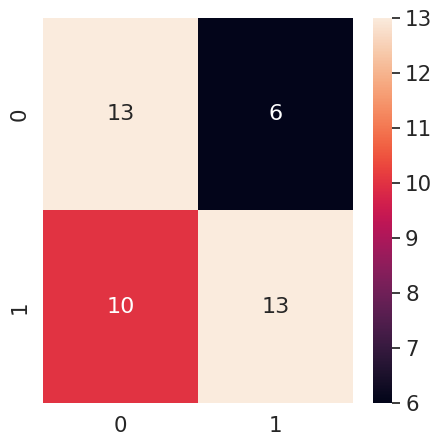

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [93]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(12/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  54.54545454545454 %


**K-Nearest Neighbors Classifiers**

In [94]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8132530120481928
Testing Accuracy : 0.6428571428571429


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Axes: >

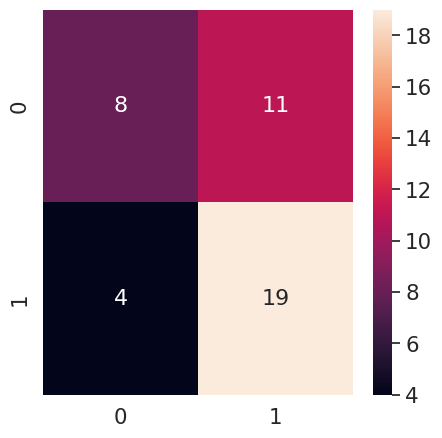

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [96]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Ada Boost Classifier**

In [97]:
from sklearn.ensemble import AdaBoostClassifier

model  = AdaBoostClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 1.0
Testing Accuracy : 0.6666666666666666


<Axes: >

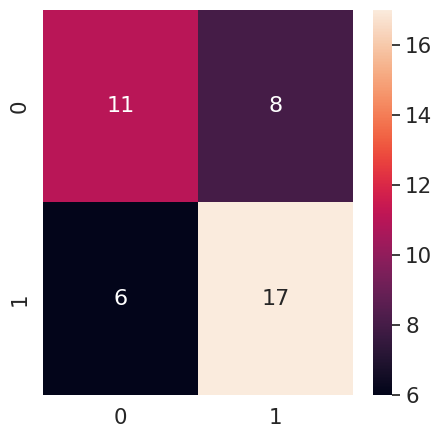

In [98]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [99]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Gradient Boosting Classifier**

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

model  = GradientBoostingClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 1.0
Testing Accuracy : 0.6190476190476191


<Axes: >

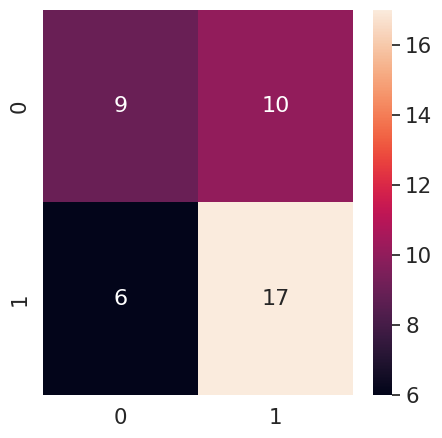

In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [102]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Xg Boost Classifier**

In [103]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

# Conversion des étiquettes de -1/1 à 0/1
y_train_mapped = (y_train + 1) // 2  # Convertit -1 en 0, et garde 1 comme 1
y_test_mapped = (y_test + 1) // 2    # Faire la même transformation pour y_test

# Création et entraînement du modèle
model = XGBClassifier()
model.fit(x_train, y_train_mapped)

# Prédiction
y_pred = model.predict(x_test)

# Évaluation du modèle (optionnel)
accuracy = accuracy_score(y_test_mapped, y_pred)
print(f"Précision du modèle: {accuracy:.4f}")

Précision du modèle: 0.6190


In [106]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()
# Convert y_train from {-1, 1} to {0, 1}
y_train = (y_train + 1) // 2
y_test = (y_test + 1) // 2  # Do the same for y_test if needed


model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [108]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.6666666666666666


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)


Selection of metric: Since the data is highly skewed, I use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC). This is because the AUPRC is more sensitive to differences between algorithms and their parameter settings rather than the AUROC

**Hyper Parameter Tuning for Xg-Boost**

In [109]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 10, 5, 7]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:06:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)


In [110]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.5662650602409638
Best Parameter:  {'max_depth': 1}


In [111]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:07:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy : 1.0
Testing Accuracy : 0.6666666666666666


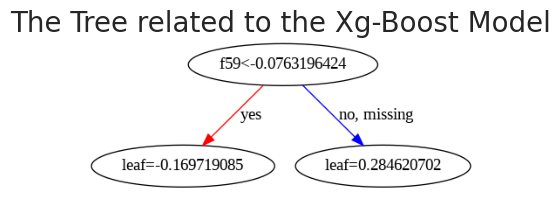

In [112]:
import matplotlib.pyplot as plt

xgb.plot_tree(model, num_trees = 0)

#plt.rcParams['figure.figsize'] = [10, 10]
plt.title('The Tree related to the Xg-Boost Model', fontsize = 20)
plt.show()

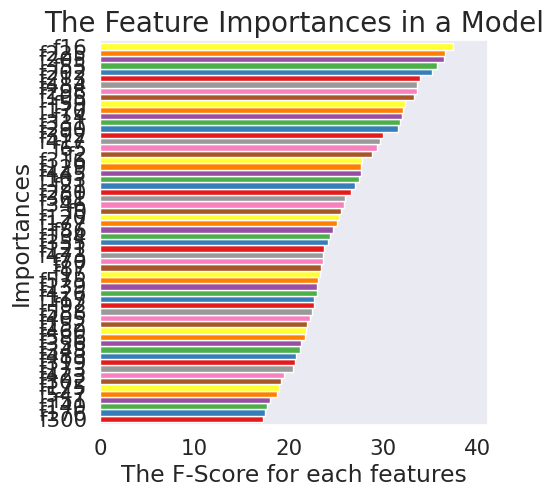

In [113]:
# plotting the feature importances

colors = plt.cm.Set1(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = False, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (30, 40)
plt.title('The Feature Importances in a Model', fontsize = 20)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

From the above feature importance plot we can clearly see that one of the test labelled as test number 140 is highly important in determining a semiconductor test's overall result as pass or fail.

In [114]:
from sklearn.model_selection import learning_curve

weights = (y == 0).sum()/(1.0*(y == -1).sum())
trainSizes, trainScores, crossValScores = learning_curve(XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4),
                                                         x_train, y_train, scoring = 'average_precision')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_w

<Axes: >

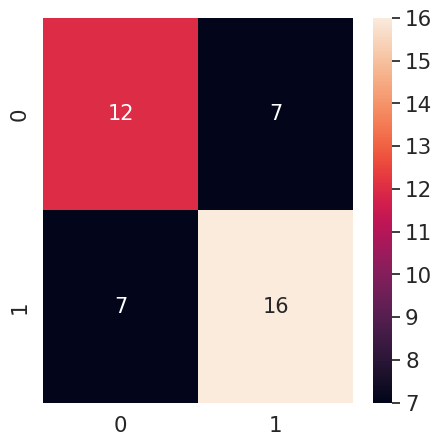

In [115]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [116]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(19/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  86.36363636363636 %


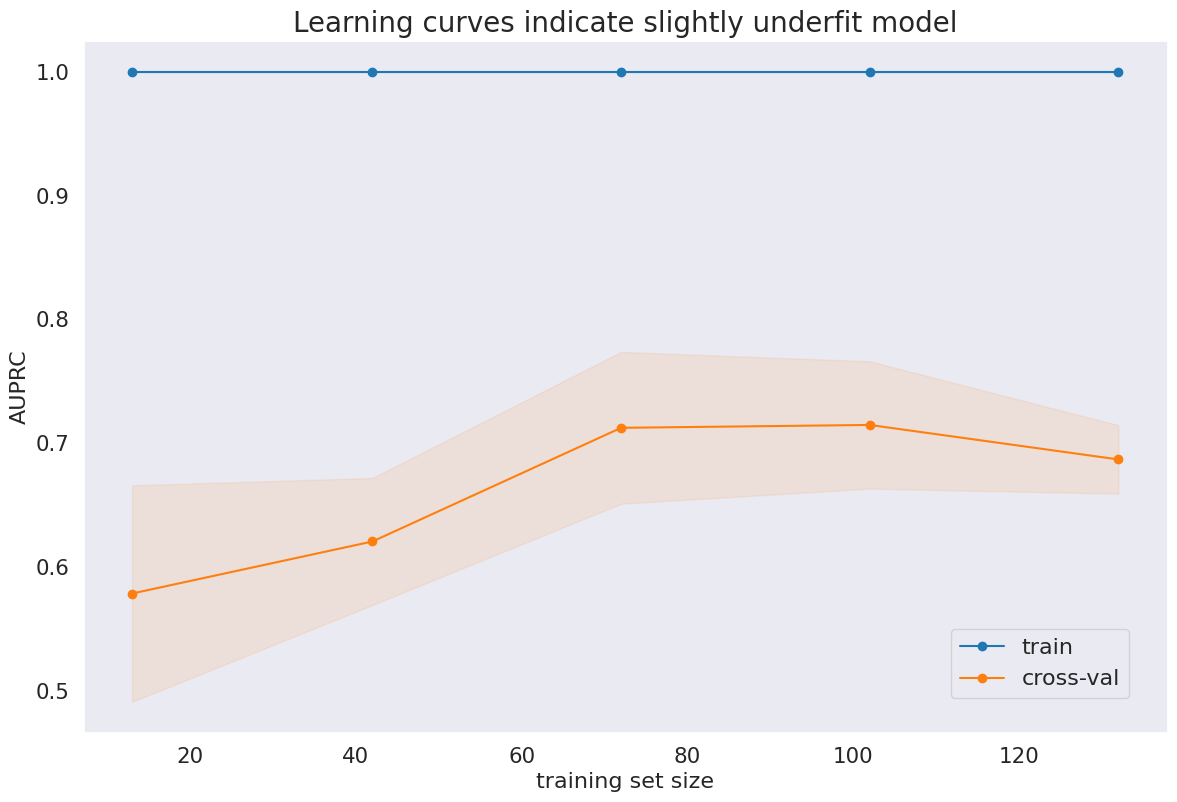

In [117]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd, crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])


plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16);
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

In [120]:
from sklearn.metrics import average_precision_score

probabilities = model.fit(x_train, y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:15:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)


AUPRC = 0.8569717351228046


**Hyper-Parameter Tuning for Naive Bayes Classifier**

In [121]:
from sklearn.naive_bayes import GaussianNB

model  = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6927710843373494
Testing Accuracy : 0.6190476190476191


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'priors': [None], 'var_smoothing': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.572289156626506
Best Parameter:  {'priors': None, 'var_smoothing': 1.0}


**It is a big Achievement that by using Grid Search CV (Hyper Parameter Tuning) we got such an amazing result that without parameters or by using the default parameters we were getting only 15% accuracy on the test set but now we are getting an whopping 93% accuracy on the test set which is very satisfiable**

In [124]:
from sklearn.naive_bayes import GaussianNB

model  = GaussianNB(priors = None, var_smoothing = 1.0)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6385542168674698
Testing Accuracy : 0.5476190476190477


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

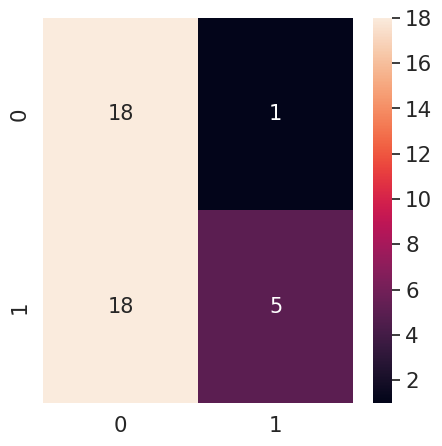

In [125]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [126]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(10/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  45.45454545454545 %


**Hyper Parameter Tuning for Support Vector Classifier**

In [127]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9879518072289156
Testing Accuracy : 0.6904761904761905


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 0.1, 0.0001, 0.000001], 'kernel': ['linear', 'rbf'], 'gamma': [0.0000001, 0.0001, 0.001, 0.01]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)


grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameters :", best_parameters)

Best Accuracy:  0.5421686746987953
Best Parameters : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [130]:
from sklearn.svm import SVC

model  = SVC( C = 1, gamma = 0.001, kernel = 'rbf')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9216867469879518
Testing Accuracy : 0.7142857142857143


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

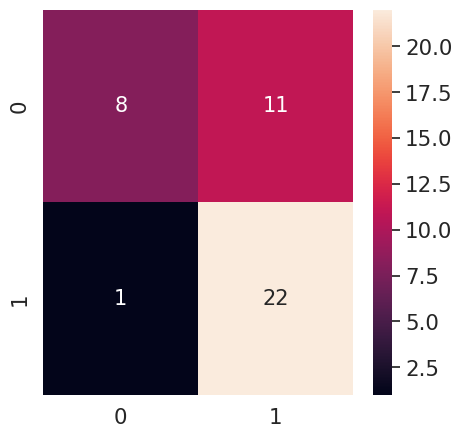

In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [132]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = float(20/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  90.9090909090909 %


In [133]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.66 %


**As, there is no increase in the value of testing accuracy, that means the SVC works good for the default values.**

**Plotting**

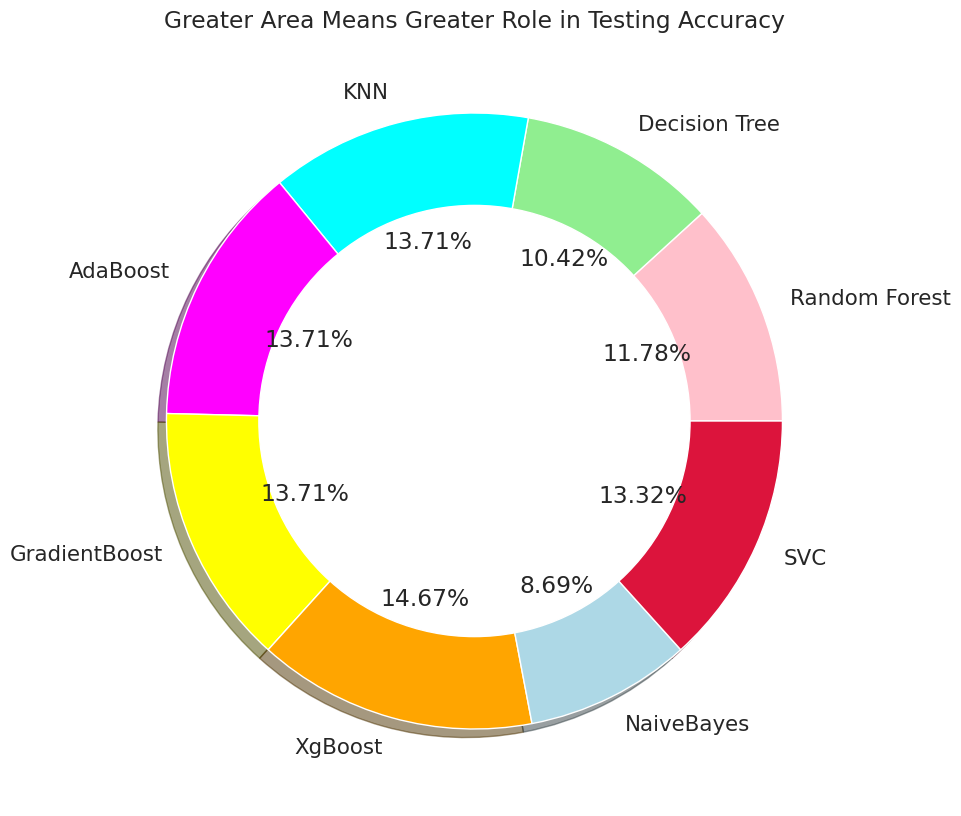

In [134]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "KNN", "AdaBoost", "GradientBoost", "XgBoost", "NaiveBayes", "SVC"
size = [61, 54, 71, 71, 71, 76, 45, 69]
colors = ['pink', 'lightgreen', 'cyan', 'magenta', 'yellow', 'orange', 'lightblue', 'crimson', 'grey']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Testing Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend()
plt.show()

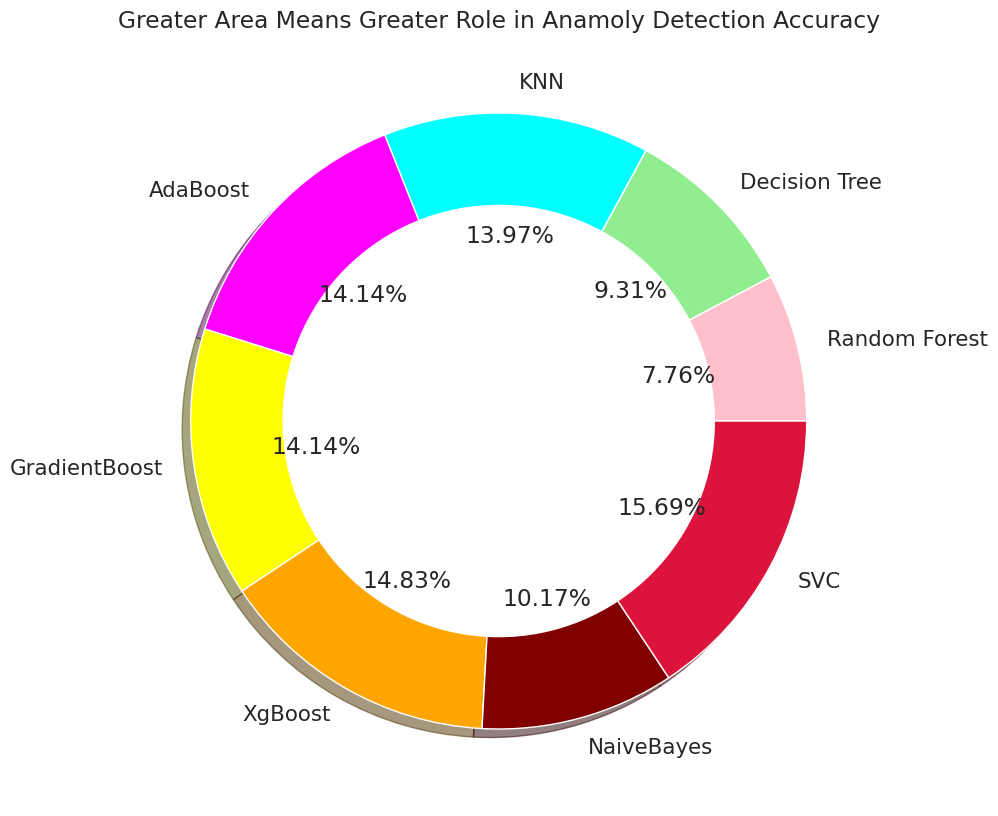

In [135]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "KNN", "AdaBoost", "GradientBoost", "XgBoost", "NaiveBayes", "SVC"
size = [45, 54, 81, 82, 82, 86, 59, 91]
colors = ['pink', 'lightgreen', 'cyan', 'magenta', 'yellow', 'orange', 'maroon', 'crimson', 'lightblue']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Anamoly Detection Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Modelling with Dimensionality Reduction**

In [136]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit(x_train)
print(pca.explained_variance_ratio_)

[7.10367589e-02 5.12363582e-02 3.59077145e-02 2.89956995e-02
 2.52961117e-02 2.40827488e-02 2.35361707e-02 2.27148777e-02
 2.24264985e-02 2.14759852e-02 2.11285915e-02 2.01196707e-02
 1.80112559e-02 1.73111704e-02 1.70323519e-02 1.61494198e-02
 1.55620023e-02 1.54007546e-02 1.47401180e-02 1.39830025e-02
 1.38736219e-02 1.34581647e-02 1.33029795e-02 1.27725974e-02
 1.22269656e-02 1.18816349e-02 1.13826095e-02 1.11511661e-02
 1.09714301e-02 1.05043722e-02 1.02131187e-02 9.95926990e-03
 9.81088764e-03 9.62895973e-03 9.44027295e-03 9.19218545e-03
 8.85651197e-03 8.57082038e-03 8.42235291e-03 8.26845251e-03
 8.18482744e-03 7.87184450e-03 7.62634922e-03 7.38518911e-03
 7.08705267e-03 7.02497398e-03 6.84160048e-03 6.80422374e-03
 6.67505703e-03 6.48411706e-03 6.27377258e-03 6.12422532e-03
 6.05861524e-03 6.01514536e-03 5.75917619e-03 5.62217872e-03
 5.48216388e-03 5.20716529e-03 5.06903551e-03 4.90182798e-03
 4.81149126e-03 4.73146584e-03 4.62150863e-03 4.50415159e-03
 4.35629170e-03 4.289008

After Applying PCA we can clearly see that we can perform Principal Component Analysis (Dimensionality Reduction because all the 590 attributes are not contributing in a big way to the result hence we can undermine the attributes which are less responsible to reach to the result, it will be helpgul for reducing the complexity as the number of columns is very high.)

**Modelling with Top 28 attributes or components**

In [137]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 30)
pca.fit(x_train)
#print(pca.explained_variance_ratio_)

PCA(n_components=30)

In [138]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9879518072289156
Testing Accuracy : 0.6904761904761905


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth = 1)

In [140]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.65 %


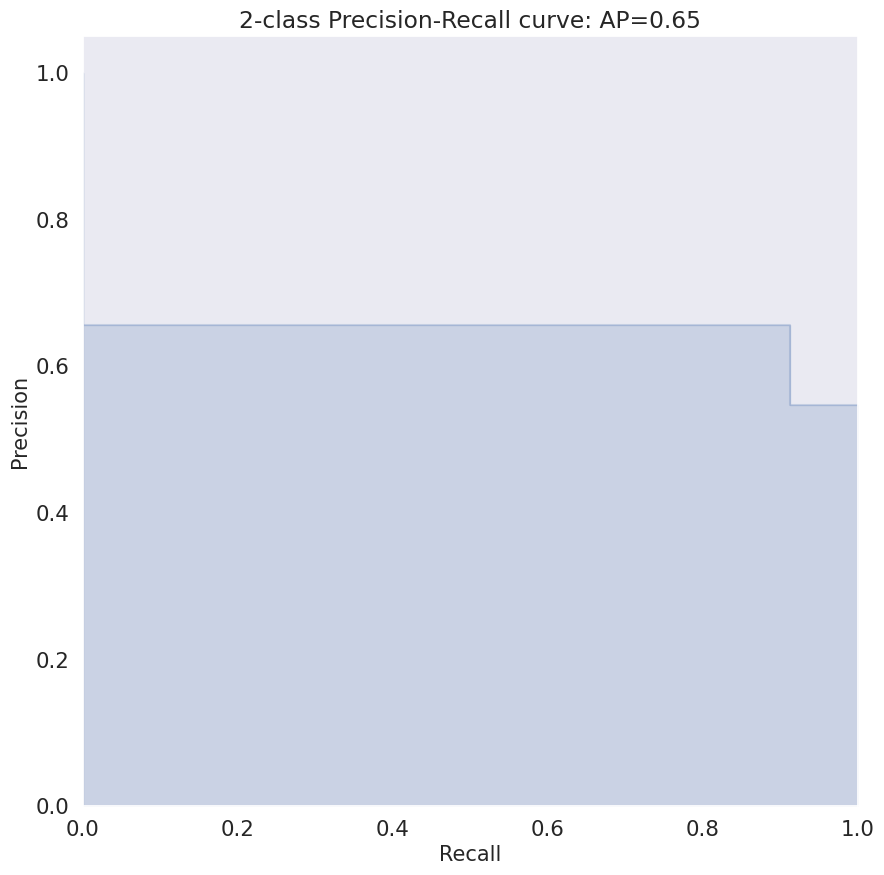

In [142]:
from sklearn.metrics import precision_recall_curve
from inspect import signature
import matplotlib.pyplot as plt

# Calcul de la courbe précision-rappel
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Vérification de la compatibilité de 'step'
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})

# Tracé de la courbe précision-rappel
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

# Calcul de l'aire sous la courbe précision-rappel (AP)
from sklearn.metrics import average_precision_score
prc = average_precision_score(y_test, y_pred)

plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))
plt.show()


In [163]:
import joblib


# Supposons que `best_model` est votre modèle choisi (par exemple un RandomForestClassifier)
joblib.dump(SVC, '/content/best_model.pkl')

['/content/best_model.pkl']

**Chargement du modèle optimisé**

In [165]:
from google.colab import files

# Téléchargez le modèle enregistré sur votre machine locale
files.download('/content/best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
# Rechargement du modèle dans une nouvelle session
best_model = joblib.load('/content/best_model.pkl')

In [167]:
from google.colab import files

# Téléchargez le fichier depuis votre machine locale vers Colab
uploaded = files.upload()

# Rechargement du modèle après l'avoir téléchargé
best_model = joblib.load('best_model.pkl')

Saving best_model.pkl to best_model.pkl


In [168]:
!pip install wandb

In [169]:
import wandb

# Initialisation de WandB
wandb.init(project="TP_IA")

# Sauvegarde du modèle avec WandB
wandb.save('/content/best_model.pkl')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mohamedafdailat21 (mohamedafdailat21-ecc) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: WARNING Saving files without folders. If you want to preserve subdirectories pass base_path to wandb.save, i.e. wandb.save("/mnt/folder/file.h5", base_path="/mnt")


['/content/TP_IA/wandb/run-20250318_132200-wsy04s5q/files/content/best_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Chargement du modèle optimisé
model = joblib.load('best_model.pkl')  # Chargez votre modèle ici

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = data.get('features')

    if not features:
        return jsonify({'error': 'No features provided'}), 400

    # Effectuer la prédiction
    try:
        prediction = model.predict([features])
        return jsonify({'prediction': int(prediction[0])})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
